Stock Market Prediction And Forecasting Using Stacked LSTM

Importing Library

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [53]:
df=pd.read_csv(r"D:\projects\AAPL.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   1258 non-null   int64  
 1   symbol       1258 non-null   object 
 2   date         1258 non-null   object 
 3   close        1258 non-null   float64
 4   high         1258 non-null   float64
 5   low          1258 non-null   float64
 6   open         1258 non-null   float64
 7   volume       1258 non-null   int64  
 8   adjClose     1258 non-null   float64
 9   adjHigh      1258 non-null   float64
 10  adjLow       1258 non-null   float64
 11  adjOpen      1258 non-null   float64
 12  adjVolume    1258 non-null   int64  
 13  divCash      1258 non-null   float64
 14  splitFactor  1258 non-null   float64
dtypes: float64(10), int64(3), object(2)
memory usage: 147.5+ KB


In [54]:
df=df.drop(columns=["Unnamed: 0","symbol"])

In [55]:
df.describe()

,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000,1258.0
mean,167.723998,169.230475,166.039780,167.548266,3.500397e+07,162.666715,164.131054,161.028013,162.493082,3.500397e+07,0.010477,1.0
std,56.850796,57.500128,56.006773,56.612707,1.729100e+07,58.733820,59.402842,57.869246,58.494560,1.729100e+07,0.083366,0.0
min,90.340000,91.670000,89.470000,90.000000,1.136204e+07,84.954351,86.205062,84.136216,84.634620,1.136204e+07,0.000000,1.0
25%,116.327500,117.405000,115.602500,116.482500,2.359205e+07,109.484490,110.393556,107.962457,109.135002,2.359205e+07,0.000000,1.0
50%,160.485000,162.080000,158.974250,160.345000,3.064771e+07,154.710645,156.091874,153.054341,154.410017,3.064771e+07,0.000000,1.0
75%,199.785000,201.277500,198.170000,199.520000,4.100487e+07,196.960053,198.428438,195.281553,196.452903,4.100487e+07,0.000000,1.0
max,327.200000,327.850000,323.350000,324.730000,1.622063e+08,326.337147,326.357095,322.497300,323.873661,1.622063e+08,0.820000,1.0


In [56]:
df.head()

,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,2015-05-27 00:00:00+00:00,132.045,132.260,130.05,130.34,45833246,121.682558,121.880685,119.844118,120.111360,45833246,0.0,1.0
1,2015-05-28 00:00:00+00:00,131.780,131.950,131.10,131.86,30733309,121.438354,121.595013,120.811718,121.512076,30733309,0.0,1.0
2,2015-05-29 00:00:00+00:00,130.280,131.450,129.90,131.23,50884452,120.056069,121.134251,119.705890,120.931516,50884452,0.0,1.0
3,2015-06-01 00:00:00+00:00,130.535,131.390,130.05,131.20,32112797,120.291057,121.078960,119.844118,120.903870,32112797,0.0,1.0
4,2015-06-02 00:00:00+00:00,129.960,130.655,129.32,129.86,33667627,119.761181,120.401640,119.171406,119.669029,33667627,0.0,1.0


In [57]:
df1=df["close"]
df1.head()


0    132.045
1    131.780
2    130.280
3    130.535
4    129.960
Name: close, dtype: float64

In [58]:
df1.shape

(1258,)

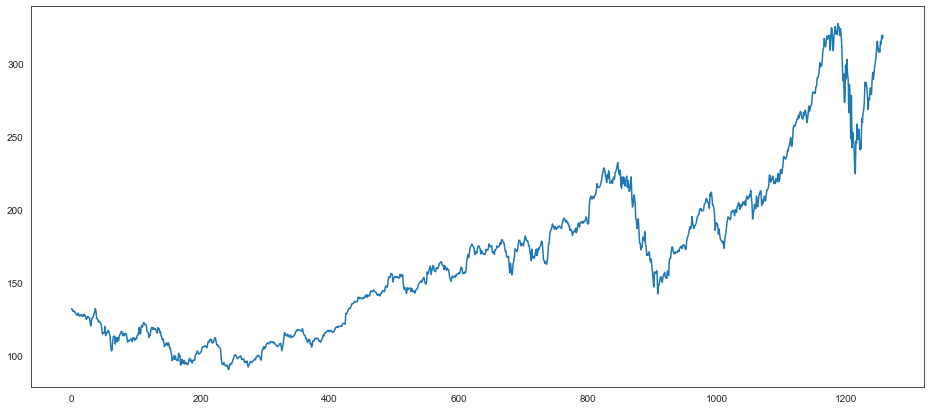

In [62]:
plt.figure(figsize=(16,7))
plt.plot(df1)

Ranging the df1 value from 0-1

In [65]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
print(df1)

[[0.17607447]
 [0.17495567]
 [0.16862282]
 ...
 [0.96635143]
 [0.9563033 ]
 [0.96491598]]


In [67]:
df1.shape

(1258, 1)

splitting dataset into train and test split

In [70]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:]
test_data.shape

(441, 1)

In [69]:
train_data.shape

(817, 1)

In [71]:
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return np.array(dataX), np.array(dataY)

In [73]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [76]:
print(X_test.shape), print(ytest.shape)

(340, 100)
(340,)


(None, None)

In [74]:
print(X_train)

[[0.17607447 0.17495567 0.16862282 ... 0.09055982 0.08388922 0.09085536]
 [0.17495567 0.16862282 0.1696994  ... 0.08388922 0.09085536 0.0873934 ]
 [0.16862282 0.1696994  0.16727181 ... 0.09085536 0.0873934  0.09030651]
 ...
 [0.34801148 0.32930845 0.32145571 ... 0.50042219 0.50413747 0.5062062 ]
 [0.32930845 0.32145571 0.32694419 ... 0.50413747 0.5062062  0.51920966]
 [0.32145571 0.32694419 0.32230009 ... 0.5062062  0.51920966 0.53719497]]


In [75]:
print(y_train)

[0.0873934  0.09030651 0.09891919 0.09887697 0.10622309 0.1213375
 0.10529427 0.10221228 0.12213966 0.12745926 0.1231107  0.1302035
 0.13607194 0.13366546 0.1291058  0.12969687 0.12762813 0.1115849
 0.10879845 0.1071519  0.09288187 0.10062906 0.09858144 0.11378029
 0.12007093 0.12226632 0.11572237 0.12049312 0.1169045  0.11597568
 0.11804441 0.11399139 0.10951617 0.10495651 0.1211264  0.11795998
 0.11774888 0.10672971 0.10905176 0.09642827 0.09347294 0.08507135
 0.08865997 0.07869628 0.06624166 0.07173014 0.07130795 0.07713417
 0.07468547 0.06957697 0.07768302 0.07168792 0.0629908  0.06337077
 0.05222494 0.04373892 0.02579583 0.027949   0.03457739 0.04061471
 0.02976442 0.03875707 0.02866672 0.02668243 0.02723128 0.02516254
 0.04677869 0.03841932 0.04074137 0.01300346 0.01583214 0.02955332
 0.02571139 0.01747868 0.02537364 0.02642911 0.0155366  0.01971629
 0.01963185 0.01659208 0.01418559 0.01540995 0.02659799 0.03284641
 0.02499367 0.02406485 0.02761125 0.01836528 0.02431816 0.0271046

In [77]:
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)
print(X_train.shape), print(X_test.shape)

(716, 100, 1)
(340, 100, 1)


(None, None)

Create the Stacked LSTM model

In [78]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM


model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))

model.compile(loss='mean_squared_error',optimizer='adam')

In [79]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [80]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 21s 292ms/step - loss: 0.0155 - val_loss: 0.0706
Epoch 2/100
12/12 [==============================] - 1s 68ms/step - loss: 0.0036 - val_loss: 0.0045
Epoch 3/100
12/12 [==============================] - 1s 72ms/step - loss: 9.7112e-04 - val_loss: 0.0072
Epoch 4/100
12/12 [==============================] - 1s 68ms/step - loss: 8.9111e-04 - val_loss: 0.0038
Epoch 5/100
12/12 [==============================] - 1s 69ms/step - loss: 7.7071e-04 - val_loss: 0.0050
Epoch 6/100
12/12 [==============================] - 1s 68ms/step - loss: 7.1728e-04 - val_loss: 0.0041
Epoch 7/100
12/12 [==============================] - 1s 69ms/step - loss: 6.0254e-04 - val_loss: 0.0046
Epoch 8/100
12/12 [==============================] - 1s 70ms/step - loss: 6.1378e-04 - val_loss: 0.0043
Epoch 9/100
12/12 [==============================] - 1s 67ms/step - loss: 5.8983e-04 - val_loss: 0.0052
Epoch 10/100
12/12 [==============================] - 1s 70ms/step - l

In [81]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

0.012762755757007282

In [82]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

0.033374170150267175

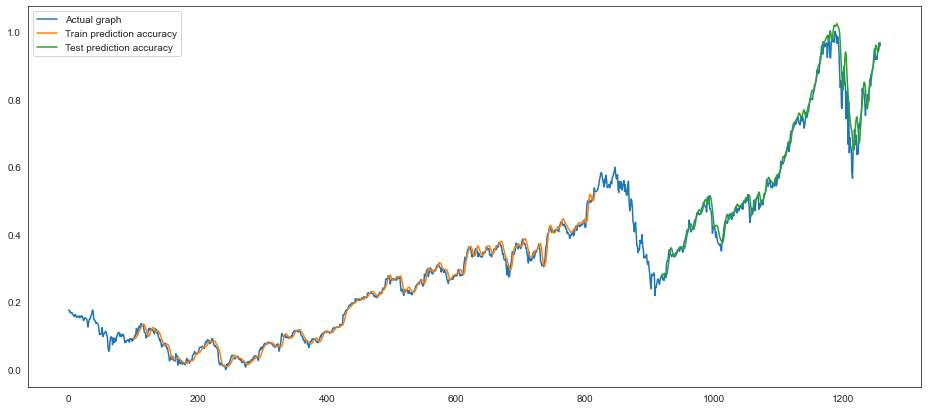

In [88]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.figure(figsize=(16,7))
plt.plot(scaler.inverse_transform(df1),label='Actual graph')
plt.plot(trainPredictPlot,label='Train prediction accuracy')
plt.plot(testPredictPlot,label='Test prediction accuracy')
plt.legend()
plt.show()

Prediction for next 30 days

In [89]:
len(test_data)

441

In [90]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 100)

In [93]:
temp_input=list(x_input)
temp_input

[array([0.85835515, 0.8866419 , 0.87431394, 0.88431985, 0.87836697,
        0.8986321 , 0.92582116, 0.92877649, 0.95676771, 0.93869797,
        0.93304061, 0.94950604, 0.96424048, 0.95512117, 0.95989192,
        0.96635143, 0.96246728, 0.92295027, 0.9598497 , 0.98792536,
        0.98594106, 0.92531453, 0.92172591, 0.96474711, 0.97572406,
        0.99159841, 0.96972895, 0.97614625, 0.96795575, 1.        ,
        0.99016297, 0.99050072, 0.96538039, 0.98488559, 0.97086887,
        0.94026007, 0.87748037, 0.83483915, 0.85413324, 0.77336823,
        0.77269273, 0.88014017, 0.84007431, 0.89673225, 0.85527316,
        0.83884995, 0.74233725, 0.82327113, 0.78143207, 0.6665963 ,
        0.7921557 , 0.64118044, 0.68614371, 0.66001013, 0.65203074,
        0.58642236, 0.56586169, 0.66089673, 0.65515494, 0.70970193,
        0.66452757, 0.69437642, 0.69218104, 0.63569197, 0.65266402,
        0.63780292, 0.7267162 , 0.71388162, 0.74191506, 0.75002111,
        0.77222832, 0.83049059, 0.8194292 , 0.82

In [92]:
temp_input=temp_input[0].tolist()
temp_input

[0.8583551465000421,
 0.886641898167694,
 0.8743139407244787,
 0.8843198513890063,
 0.8783669678290973,
 0.8986321033521911,
 0.9258211601790087,
 0.928776492442793,
 0.9567677108840664,
 0.9386979650426412,
 0.9330406147091108,
 0.9495060373216246,
 0.9642404796082074,
 0.9551211686228152,
 0.9598919192772102,
 0.9663514312251964,
 0.9624672802499366,
 0.9229502659799036,
 0.9598497002448703,
 0.987925356750823,
 0.9859410622308538,
 0.9253145317909313,
 0.9217259140420502,
 0.9647471079962848,
 0.9757240564046272,
 0.991598412564384,
 0.9697289538123786,
 0.9761462467280251,
 0.967955754454108,
 1.0,
 0.9901629654648316,
 0.9905007177235496,
 0.9653803934813814,
 0.9848855864223591,
 0.9708688676855526,
 0.9402600692392131,
 0.8774803681499619,
 0.8348391454867854,
 0.8541332432660642,
 0.7733682344000674,
 0.7726927298826312,
 0.8801401671873681,
 0.840074305496918,
 0.896732246896901,
 0.8552731571392385,
 0.8388499535590643,
 0.7423372456303302,
 0.8232711306256859,
 0.78143206957

In [98]:
# demonstrate prediction for next 10 days


lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.9905763]
93
[0.9905763]
94
[0.9905763]
95
[0.9905763]
96
[0.9905763]
97
[0.9905763]
98
[0.9905763]
99
[0.9905763]
100
[0.9905763]
101
9 day input [0.99057633 0.99057633 0.99057633 0.99057633 0.99057633 0.99057633
 0.99057633 0.99057633 0.99057633 0.99057633 0.99057633 0.99057633
 0.99057633 0.99057633 0.99057633 0.99057633 0.99057633 0.99057633
 0.99057633 0.99057633 0.99057633 0.99057633 0.99057633 0.99057633
 0.99057633 0.99057633 0.99057633 0.99057633 0.99057633 0.99057633
 0.99057633 0.99057633 0.99057633 0.99057633 0.99057633 0.99057633
 0.99057633 0.99057633 0.99057633 0.99057633 0.99057633 0.99057633
 0.99057633 0.99057633 0.99057633 0.99057633 0.99057633 0.99057633
 0.99057633 0.99057633 0.99057633 0.99057633 0.99057633 0.99057633
 0.99057633 0.99057633 0.99057633 0.99057633 0.99057633 0.99057633
 0.99057633 0.99057633 0.99057633 0.99057633 0.99057633 0.99057633
 0.99057633 0.99057633 0.99057633 0.99057633 0.99057633 0.99057633
 0.99057633 0.99057633 0.99057633 0.99057633 0.

In [103]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)
day_pred.shape,day_new.shape

((30,), (100,))

In [104]:
len(df1)

1258

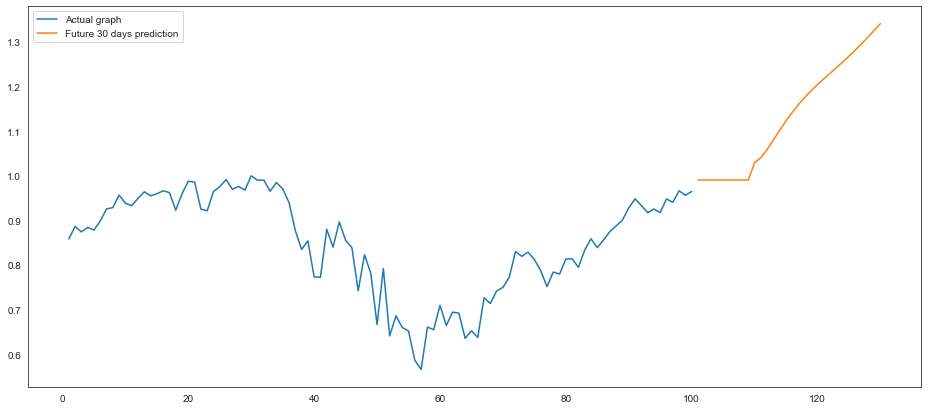

In [109]:
plt.figure(figsize=(16,7))
plt.plot(day_new,scaler.inverse_transform(df1[1158:]),label='Actual graph')
plt.plot(day_pred,scaler.inverse_transform(lst_output),label='Future 30 days prediction')
plt.legend()

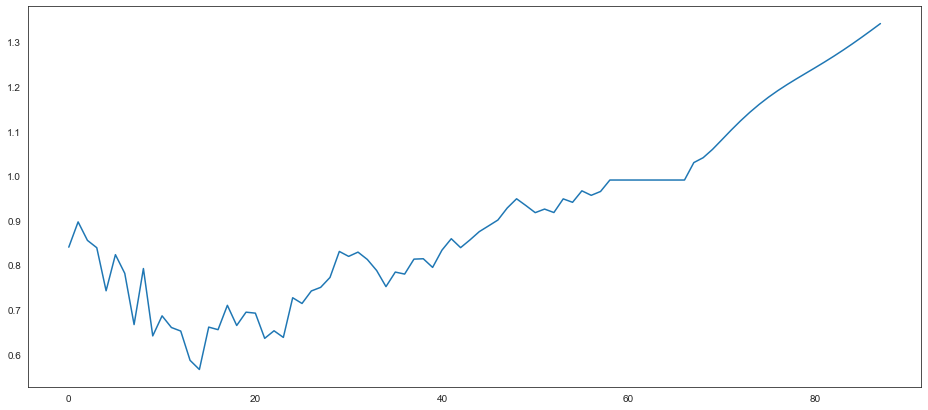

In [111]:
plt.figure(figsize=(16,7))
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

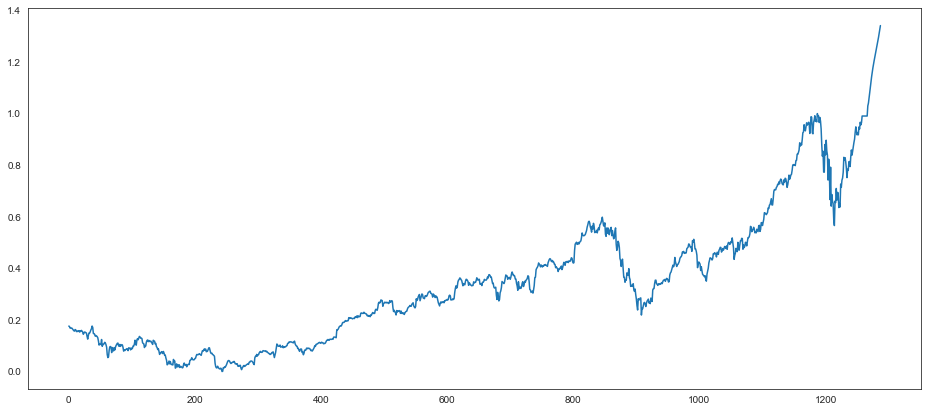

In [112]:
plt.figure(figsize=(16,7))
df3=scaler.inverse_transform(df3).tolist()
plt.plot(df3)